# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Liniowa analiza dyskryminacyjna Fishera


Idea - maksymalizacja stosunku wariancji:


$$ \frac{\sigma_b^2}{\sigma_w^2}$$


Niech $S_b$ będzie macierzą kowariancji (lub scatter matrix) pomiędzy klasami

$$S_b= \sum_c N_c \left(\mu_c-\mu\right) \left(\mu_c-\mu\right)^T$$

gdzie $\mu_c$ oznacza średni wektor cech w obrębie jednej klasy $c$ o liczebności $N_c$.


Niech $S_{wc}$ będzie macierzą kowariancji (lub scatter matrix) wewnątrz  klasy:

$$S_{wc}= \frac{1}{N_c-1}\sum_{i\in c} \left(x_i-\mu_c\right) \left(x_i-\mu_c\right)^T$$

gdzie $\mu_i$ oznacza średni wektor cech w obrębie jednej klasy o liczebności $N_c$.

Interesuje nas suma takich macierzy:

$$S_w= \sum_c S_{wc}  = \sum_c\frac{1}{N_c-1}\sum_{i\in c} \left(x_i-\mu_c\right) \left(x_i-\mu_c\right)^T$$


Analiza dyskryminacyjna Fishera poszukuje takich wektorów $\mathbf{w}$, które maksymalizują:

$$ J = \frac{\mathbf{w}^T S_b\mathbf{w}}{\mathbf{w}^T S_w\mathbf{w}}.$$

Ponieważ $J$ jest niezmiennicze względem skalowania $\mathbf{w}\to\alpha\mathbf{w}$, to możemy ograniczyć się do takich $\mathbf{w}$, że $\mathbf{w}^T S_w\mathbf{w}=1$. Wtedy mamy zagadnienie minimalizacyjne:

$$  \mathrm{min}_\mathbf{w}  -\mathbf{w}^T S_b\mathbf{w} \\
  \mathbf{w}^T S_w\mathbf{w} = 1 $$

Stosując mnożniki Lagrange'a mamy:

$$L = -\frac{1}{2} \mathbf{w}^T S_b\mathbf{w} + \frac{1}{2} \lambda \left(\mathbf{w}^T S_w\mathbf{w} - 1\right)  $$

$$
\frac{\partial L}{\partial \mathbf{w}} = -S_b\mathbf{w} + \lambda  S_w\mathbf{w} = 0
$$

czyli:

$$
 S_b\mathbf{w} = \lambda  S_w\mathbf{w} 
$$

Powyższe wyrażenie jest tzw. uogólnionym zagadnieniem własnym. Jeśli istnieje macierz odwrotna $S_w^{-1}$ to można je sprowadzić do:


$$
 S_w^{-1} S_b\mathbf{w} = \lambda  \mathbf{w} 
$$




In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 

In [20]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [21]:
X.shape

(178, 13)

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Wyznacz liczbę klas 

In [23]:
#classes_ = [2,3,4,5,6] # niepoprawne 

classes = np.unique(y)
print(classes)

[0 1 2]


In [24]:
assert len(classes) == 3

### Oblicz macierze kowariancji wewnątrzklasowe

Oblicz dla przykładów z każdej klasy macierz kowariancji (np. użyj `np.cov`) a nastęmnie ich sumę $S_w$.

$$S_w= \sum_c\underbrace{\frac{1}{N_c-1}\sum_{i\in c} \left(x_i-\mu_c\right) \left(x_i-\mu_c\right)^T}_{\mathrm{np.cov}}$$



In [25]:
Sw = sum([np.cov(X[y==i].T) for i in classes])

In [26]:
assert Sw.shape == (13,13)
np.testing.assert_allclose(Sw[1,2],0.055372, rtol=1e-3)

### Oblicz macierz kowariancji pomiędzy klasami


Niech $S_b$ będzie macierzą kowariancji (lub  scatter matrix) pomiędzy klasami

$$S_b= \sum_c N_c \left(\mu_c-\mu\right) \left(\mu_c-\mu\right)^T$$

gdzie $\mu_c$ oznacza średni wektor cech w obrębie jednej klasy $c$ o liczebności $N_c$.



In [27]:
#mu_c = [np.mean(X[y==c_], axis=0) for c_ in classes] 

In [28]:
mu = np.mean(X, axis=0)
mu

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [29]:
mu = np.mean(X, axis=0)
Sb = sum([np.sum(y==c_)*np.outer(np.mean(X[y==c_], axis=0)-mu,np.mean(X[y==c_], axis=0)-mu) for c_ in classes])
Sb.shape                           

(13, 13)

In [30]:
np.testing.assert_allclose(Sb[3,1],117.92843036,rtol=1e-3)
assert Sb.shape == (13,13)


### Wartości własne

Oblicz wartości własne macierzy:  

$$
 S_w^{-1} S_b
$$

i odpowiadające im wektory własne.

1. Zastosuj ` np.linalg.eig`, oraz `np.linalg.inv`.
2. Otrzymane wartości mogą zawierać część urojoną, użyj np. `np.real_if_close` by wyzerować części urojone.


In [39]:
lam, v = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))
lam = np.real_if_close(lam)
lam

array([-5.68434189e-14,  2.43232619e+02,  5.46416494e+02,  4.85459229e-14,
        5.46117659e-14, -4.73267313e-14, -3.14400355e-14, -1.00853404e-14,
       -1.00853404e-14,  1.08111137e-14,  2.01646744e-15,  2.01646744e-15,
       -4.03142928e-15])

In [40]:
assert lam.shape ==(13,)
np.testing.assert_allclose(np.max(lam), 546, rtol=1e-2 )

### Operator rzutowania na podprzestrzeń


Posortuj wektory własne według malejących wartości własnych. 

Zbuduj operator $W$ będący macierzą $(2,13)$ składający się z dwóch wektorów własnych odpowiadających największym wartościom własnym.

In [47]:
#idx = [1, 2]  # niepoprawne 

idx = np.argsort(lam)[-2:][::-1]

[2 1]


In [44]:
np.testing.assert_allclose(lam[idx],[546.41649425, 243.23261924],rtol=1e-2)

In [54]:
W = np.real_if_close(v[:, idx])
W = W.T
W.shape

(2, 13)

In [55]:
np.testing.assert_allclose(np.abs(W[:,:3]),[[0.13138292,  0.05322257, 0.12283844],[0.24550374, 0.07699549, 0.67155662]], rtol=1e-2)

assert W.shape == (2,13)

### Wizualizacja wyniku

Operacja rzutowania może być w numpy zapisana jako `X.dot(W.T)`, więc w zredukowanej przestrzeni mamy:

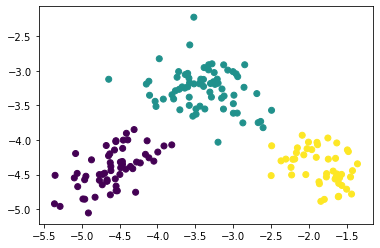

In [56]:
plt.scatter( X.dot(W.T)[:,0],X.dot(W.T)[:,1],c=y)

### Porównaj wynik z `sklearn`

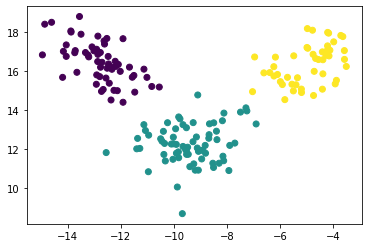

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
X_r2 = lda.fit(X, y).transform(X)
plt.scatter( X_r2[:,0],X_r2[:,1],c=y)